In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
FCFF = [7484402.26, 9353649.99, 5904181.78]
Efectivo = 15723000
Deuda = 90541000
Acciones = 1323000

# Función para calcular el valor de la empresa usando DCF
def calcular_valor_empresa(FCFF, WACC, g):
    valor_presente_FCFF = sum([FCFF[i] / (1 + WACC)**(i+1) for i in range(len(FCFF))])
    valor_terminal = (FCFF[-1] * (1 + g)) / (WACC - g)
    valor_presente_terminal = valor_terminal / (1 + WACC)**len(FCFF)
    return valor_presente_FCFF + valor_presente_terminal

# Función para calcular el precio por acción
def calcular_precio_accion(valor_empresa, Efectivo, Deuda, Acciones):
    return (valor_empresa + Efectivo - Deuda) / Acciones

# Creación de rangos de WACC y g
WACC_rango = np.arange(0.04, 0.081, 0.001)
g_rango = np.arange(0.015, 0.031, 0.0005)

# Matriz para almacenar los precios por acción para cada combinación de WACC y g
precios_accion = np.zeros((len(WACC_rango), len(g_rango)))

# Cálculo de precios por acción para cada combinación de WACC y g
for i, WACC in enumerate(WACC_rango):
    for j, g in enumerate(g_rango):
        valor_empresa = calcular_valor_empresa(FCFF, WACC, g)
        precios_accion[i, j] = calcular_precio_accion(valor_empresa, Efectivo, Deuda, Acciones)

In [2]:
# El código proporcionado por el usuario para generar la matriz de precios por acción
# se ejecutará tal como está para generar la matriz completa

# Creación de rangos de WACC y g con la corrección en el rango de g
WACC_rango = np.arange(0.04, 0.081, 0.001)
g_rango = np.arange(0.015, 0.0305, 0.0005)  # Corregido hasta 0.0305 para incluir 0.03

# Matriz para almacenar los precios por acción para cada combinación de WACC y g
precios_accion = np.zeros((len(WACC_rango), len(g_rango)))

# Utilizar el código existente para calcular la matriz de precios por acción
for i, WACC in enumerate(WACC_rango):
    for j, g in enumerate(g_rango):
        valor_empresa = calcular_valor_empresa(FCFF, WACC, g)
        precios_accion[i, j] = calcular_precio_accion(valor_empresa, Efectivo, Deuda, Acciones)

# Código para visualizar la matriz completa
# Como la matriz es grande, se mostrará en secciones si es necesario
def imprimir_matriz_completa(matriz, rangox, rangoy):
    # Imprimir las cabeceras de las columnas (valores de g)
    print("g/WACC", end='\t')
    for g in rangoy:
        print(f"{g:.4f}", end='\t')
    print("\n" + "-" * 100)

    # Imprimir las filas de la matriz
    for i, WACC in enumerate(rangox):
        # WACC como cabecera de fila
        print(f"{WACC:.3f}", end='\t')
        for j, precio in enumerate(matriz[i]):
            # Precio por acción para cada combinación de WACC y g
            print(f"{precio:.2f}", end='\t')
        print()  # Nueva línea al final de cada fila

# Llamar a la función para imprimir la matriz completa
imprimir_matriz_completa(precios_accion, WACC_rango, g_rango)

g/WACC	0.0150	0.0155	0.0160	0.0165	0.0170	0.0175	0.0180	0.0185	0.0190	0.0195	0.0200	0.0205	0.0210	0.0215	0.0220	0.0225	0.0230	0.0235	0.0240	0.0245	0.0250	0.0255	0.0260	0.0265	0.0270	0.0275	0.0280	0.0285	0.0290	0.0295	0.0300	
----------------------------------------------------------------------------------------------------
0.040	120.47	123.83	127.34	131.00	134.82	138.80	142.97	147.33	151.90	156.69	161.73	167.02	172.58	178.45	184.65	191.20	198.13	205.49	213.30	221.62	230.49	239.98	250.14	261.06	272.81	285.51	299.26	314.21	330.52	348.38	368.03	
0.041	113.80	116.90	120.13	123.49	126.99	130.65	134.46	138.43	142.59	146.95	151.51	156.29	161.31	166.59	172.15	178.01	184.19	190.73	197.65	204.99	212.79	221.09	229.95	239.41	249.56	260.45	272.18	284.86	298.58	313.50	329.78	
0.042	107.62	110.49	113.47	116.57	119.80	123.15	126.65	130.29	134.09	138.07	142.22	146.56	151.11	155.89	160.90	166.17	171.72	177.56	183.73	190.26	197.17	204.49	212.28	220.56	229.40	238.85	248.98	259.85	271.56	284.21	297.91	
0.

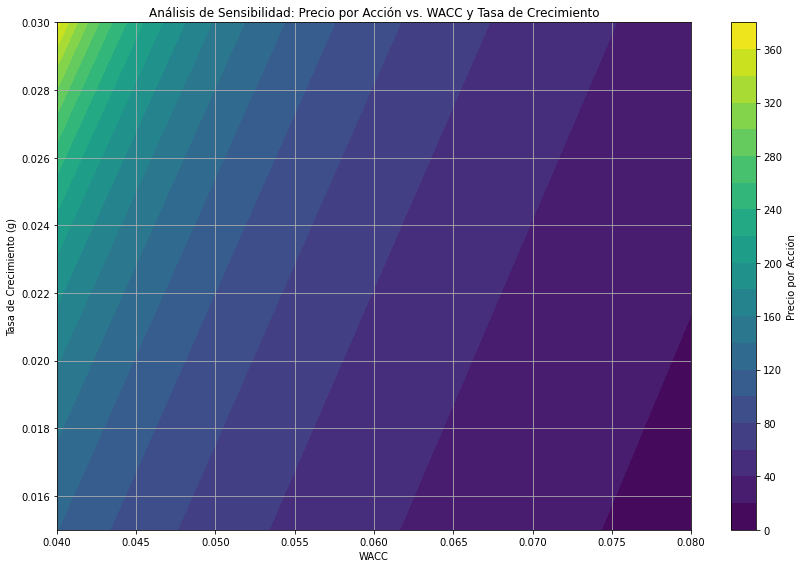

In [3]:
# Creación del gráfico de análisis de sensibilidad
plt.figure(figsize=(12, 8))
plt.contourf(WACC_rango, g_rango, precios_accion.T, levels=20, cmap='viridis')
plt.colorbar(label='Precio por Acción')
plt.xlabel('WACC')
plt.ylabel('Tasa de Crecimiento (g)')
plt.title('Análisis de Sensibilidad: Precio por Acción vs. WACC y Tasa de Crecimiento')
plt.grid(True)
plt.tight_layout()
plt.show()